In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
import pathlib
import shutil
import kagglehub

In [2]:
destino = pathlib.Path("csv_collected").resolve()

if not destino.exists():
    destino.mkdir()
    print(f"Pasta criada: {destino}")
else:
    print(f"Pasta já existe: {destino}")

arquivos_existentes = list(destino.glob("*"))
if arquivos_existentes:
    print("Arquivos já existem na pasta 'csv_collected'. Pulando download.")
else:
    print("Nenhum arquivo encontrado. Iniciando download...")

    path = kagglehub.dataset_download("allanbruno/airbnb-rio-de-janeiro")
    print("Baixado em:", path)

    for arquivo in pathlib.Path(path).iterdir():
        destino_arquivo = destino / arquivo.name
        shutil.copy2(arquivo, destino_arquivo)
        print(f"Copiado: {arquivo.name}")

    print("\nTodos os arquivos foram copiados para a pasta 'csv_collected'.")

Pasta criada: C:\Users\edilb\bancos2\Airbnb_2019_Rio\csv_collected
Nenhum arquivo encontrado. Iniciando download...
Baixado em: C:\Users\edilb\.cache\kagglehub\datasets\allanbruno\airbnb-rio-de-janeiro\versions\4
Copiado: abril2018.csv
Copiado: abril2019.csv
Copiado: abril2020.csv
Copiado: agosto2018.csv
Copiado: agosto2019.csv
Copiado: dezembro2018.csv
Copiado: dezembro2019.csv
Copiado: fevereiro2019.csv
Copiado: fevereiro2020.csv
Copiado: janeiro2019.csv
Copiado: janeiro2020.csv
Copiado: julho2018.csv
Copiado: julho2019.csv
Copiado: junho2019.csv
Copiado: maio2018.csv
Copiado: maio2019.csv
Copiado: maio2020.csv
Copiado: maro2019.csv
Copiado: maro2020.csv
Copiado: novembro2019.csv
Copiado: novrmbro2018.csv
Copiado: outubro2018.csv
Copiado: outubro2019.csv
Copiado: setembro2018.csv
Copiado: setembro2019.csv
Copiado: total_data.csv

Todos os arquivos foram copiados para a pasta 'csv_collected'.


In [3]:

meses = {
    'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6,
    'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12
}


caminho_bases = pathlib.Path('csv_collected')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    if arquivo.suffix != '.csv': 
        continue

    nome_mes = arquivo.name[:3].lower()  
    if nome_mes not in meses:
        print(f"Arquivo ignorado: {arquivo.name}")
        continue

    mes = meses[nome_mes]              

    ano = int(arquivo.name[-8:].replace('.csv', '')) 

    if ano != 2019:
        continue

    df = pd.read_csv(arquivo, low_memory=False)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = pd.concat([base_airbnb, df], ignore_index=True)

display(base_airbnb)


Arquivo ignorado: total_data.csv


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ano,mes
0,17878,https://www.airbnb.com/rooms/17878,20190416181629,2019-04-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1,0,0,2.10,2019,4
1,25026,https://www.airbnb.com/rooms/25026,20190416181629,2019-04-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3,0,0,2.12,2019,4
2,31560,https://www.airbnb.com/rooms/31560,20190416181629,2019-04-17,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1,0,0,2.33,2019,4
3,35636,https://www.airbnb.com/rooms/35636,20190416181629,2019-04-17,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1,0,0,2.20,2019,4
4,35764,https://www.airbnb.com/rooms/35764,20190416181629,2019-04-16,COPACABANA SEA BREEZE - RIO,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1,0,0,2.80,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422031,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,flexible,f,f,15,15,0,0,NaN,2019,9
422032,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,flexible,f,f,1,1,0,0,NaN,2019,9
422033,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,strict_14_with_grace_period,f,f,29,23,6,0,NaN,2019,9
422034,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,NaN,2019,9


In [4]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('base_bronze.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [5]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
print(list(base_airbnb.columns))
display(base_airbnb)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,within an hour,100%,f,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2019,4
1,within a day,88%,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,3,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,4
2,within an hour,100%,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2019,4
3,within a few hours,100%,t,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,...,9.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2019,4
4,within an hour,100%,t,1.0,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422031,within an hour,93%,f,0.0,-23.00318,-43.34284,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
422032,NaN,NaN,f,0.0,-22.96664,-43.39345,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
422033,within a few hours,74%,f,32.0,-22.96208,-43.17552,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
422034,NaN,NaN,f,0.0,-23.00340,-43.34182,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


# Tratar Valores Faltando
- Para as colunas que tiverem mais de 300k de valores Null vamos apenas remover elas pois não tem muito o que fazer (levando em conta que temos umabase com 400k de dados)

In [6]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_response_time             171310
host_response_rate             171310
host_is_superhost                 309
host_listings_count               309
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                         808
bedrooms                          324
beds                              621
bed_type                            0
amenities                           0
price                               0
security_deposit               191984
cleaning_fee                   143897
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           207234
review_scores_accuracy         207467
review_scores_cleanliness      207405
review_scores_checkin          207486
review_score

Vamos dropar todos os NaN de nossa base

In [7]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)

(115766, 34)


Demonstrando o tipo de cada coluna com o valor da primeira linha de cada uma.

In [8]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_response_time              object
host_response_rate              object
host_is_superhost               object
host_listings_count            float64
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                           object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin    

In [9]:
# host_response_rate (removendo % e convertendo)
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].str.replace('%', '')
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].astype(np.float32, copy=False)

# price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

# extra_people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

# security_deposit
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace('$', '')
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace(',', '')
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].astype(np.float32, copy=False)

# cleaning_fee
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace('$', '')
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace(',', '')
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].astype(np.float32, copy=False)

# host_is_superhost (t/f → boolean)
base_airbnb['host_is_superhost'] = base_airbnb['host_is_superhost'].map({'t': True, 'f': False}).astype(bool)

# instant_bookable (t/f → boolean)
base_airbnb['instant_bookable'] = base_airbnb['instant_bookable'].map({'t': True, 'f': False}).astype(bool)

# is_business_travel_ready (t/f → boolean)
base_airbnb['is_business_travel_ready'] = base_airbnb['is_business_travel_ready'].map({'t': True, 'f': False}).astype(bool)

# host_response_time, property_type, room_type, bed_type, amenities, cancellation_policy → string
cols_string = [
    'host_response_time', 'property_type', 'room_type',
    'bed_type', 'amenities', 'cancellation_policy'
]
base_airbnb[cols_string] = base_airbnb[cols_string].astype('string')

# latitude e longitude → float32 (reduz espaço)
base_airbnb['latitude'] = base_airbnb['latitude'].astype(np.float32, copy=False)
base_airbnb['longitude'] = base_airbnb['longitude'].astype(np.float32, copy=False)

# verificando os tipos finais
print(base_airbnb.dtypes)

host_response_time             string[python]
host_response_rate                    float32
host_is_superhost                        bool
host_listings_count                   float64
latitude                              float32
longitude                             float32
property_type                  string[python]
room_type                      string[python]
accommodates                            int64
bathrooms                             float64
bedrooms                              float64
beds                                  float64
bed_type                       string[python]
amenities                      string[python]
price                                 float32
security_deposit                      float32
cleaning_fee                          float32
guests_included                         int64
extra_people                          float32
minimum_nights                          int64
maximum_nights                          int64
number_of_reviews                 

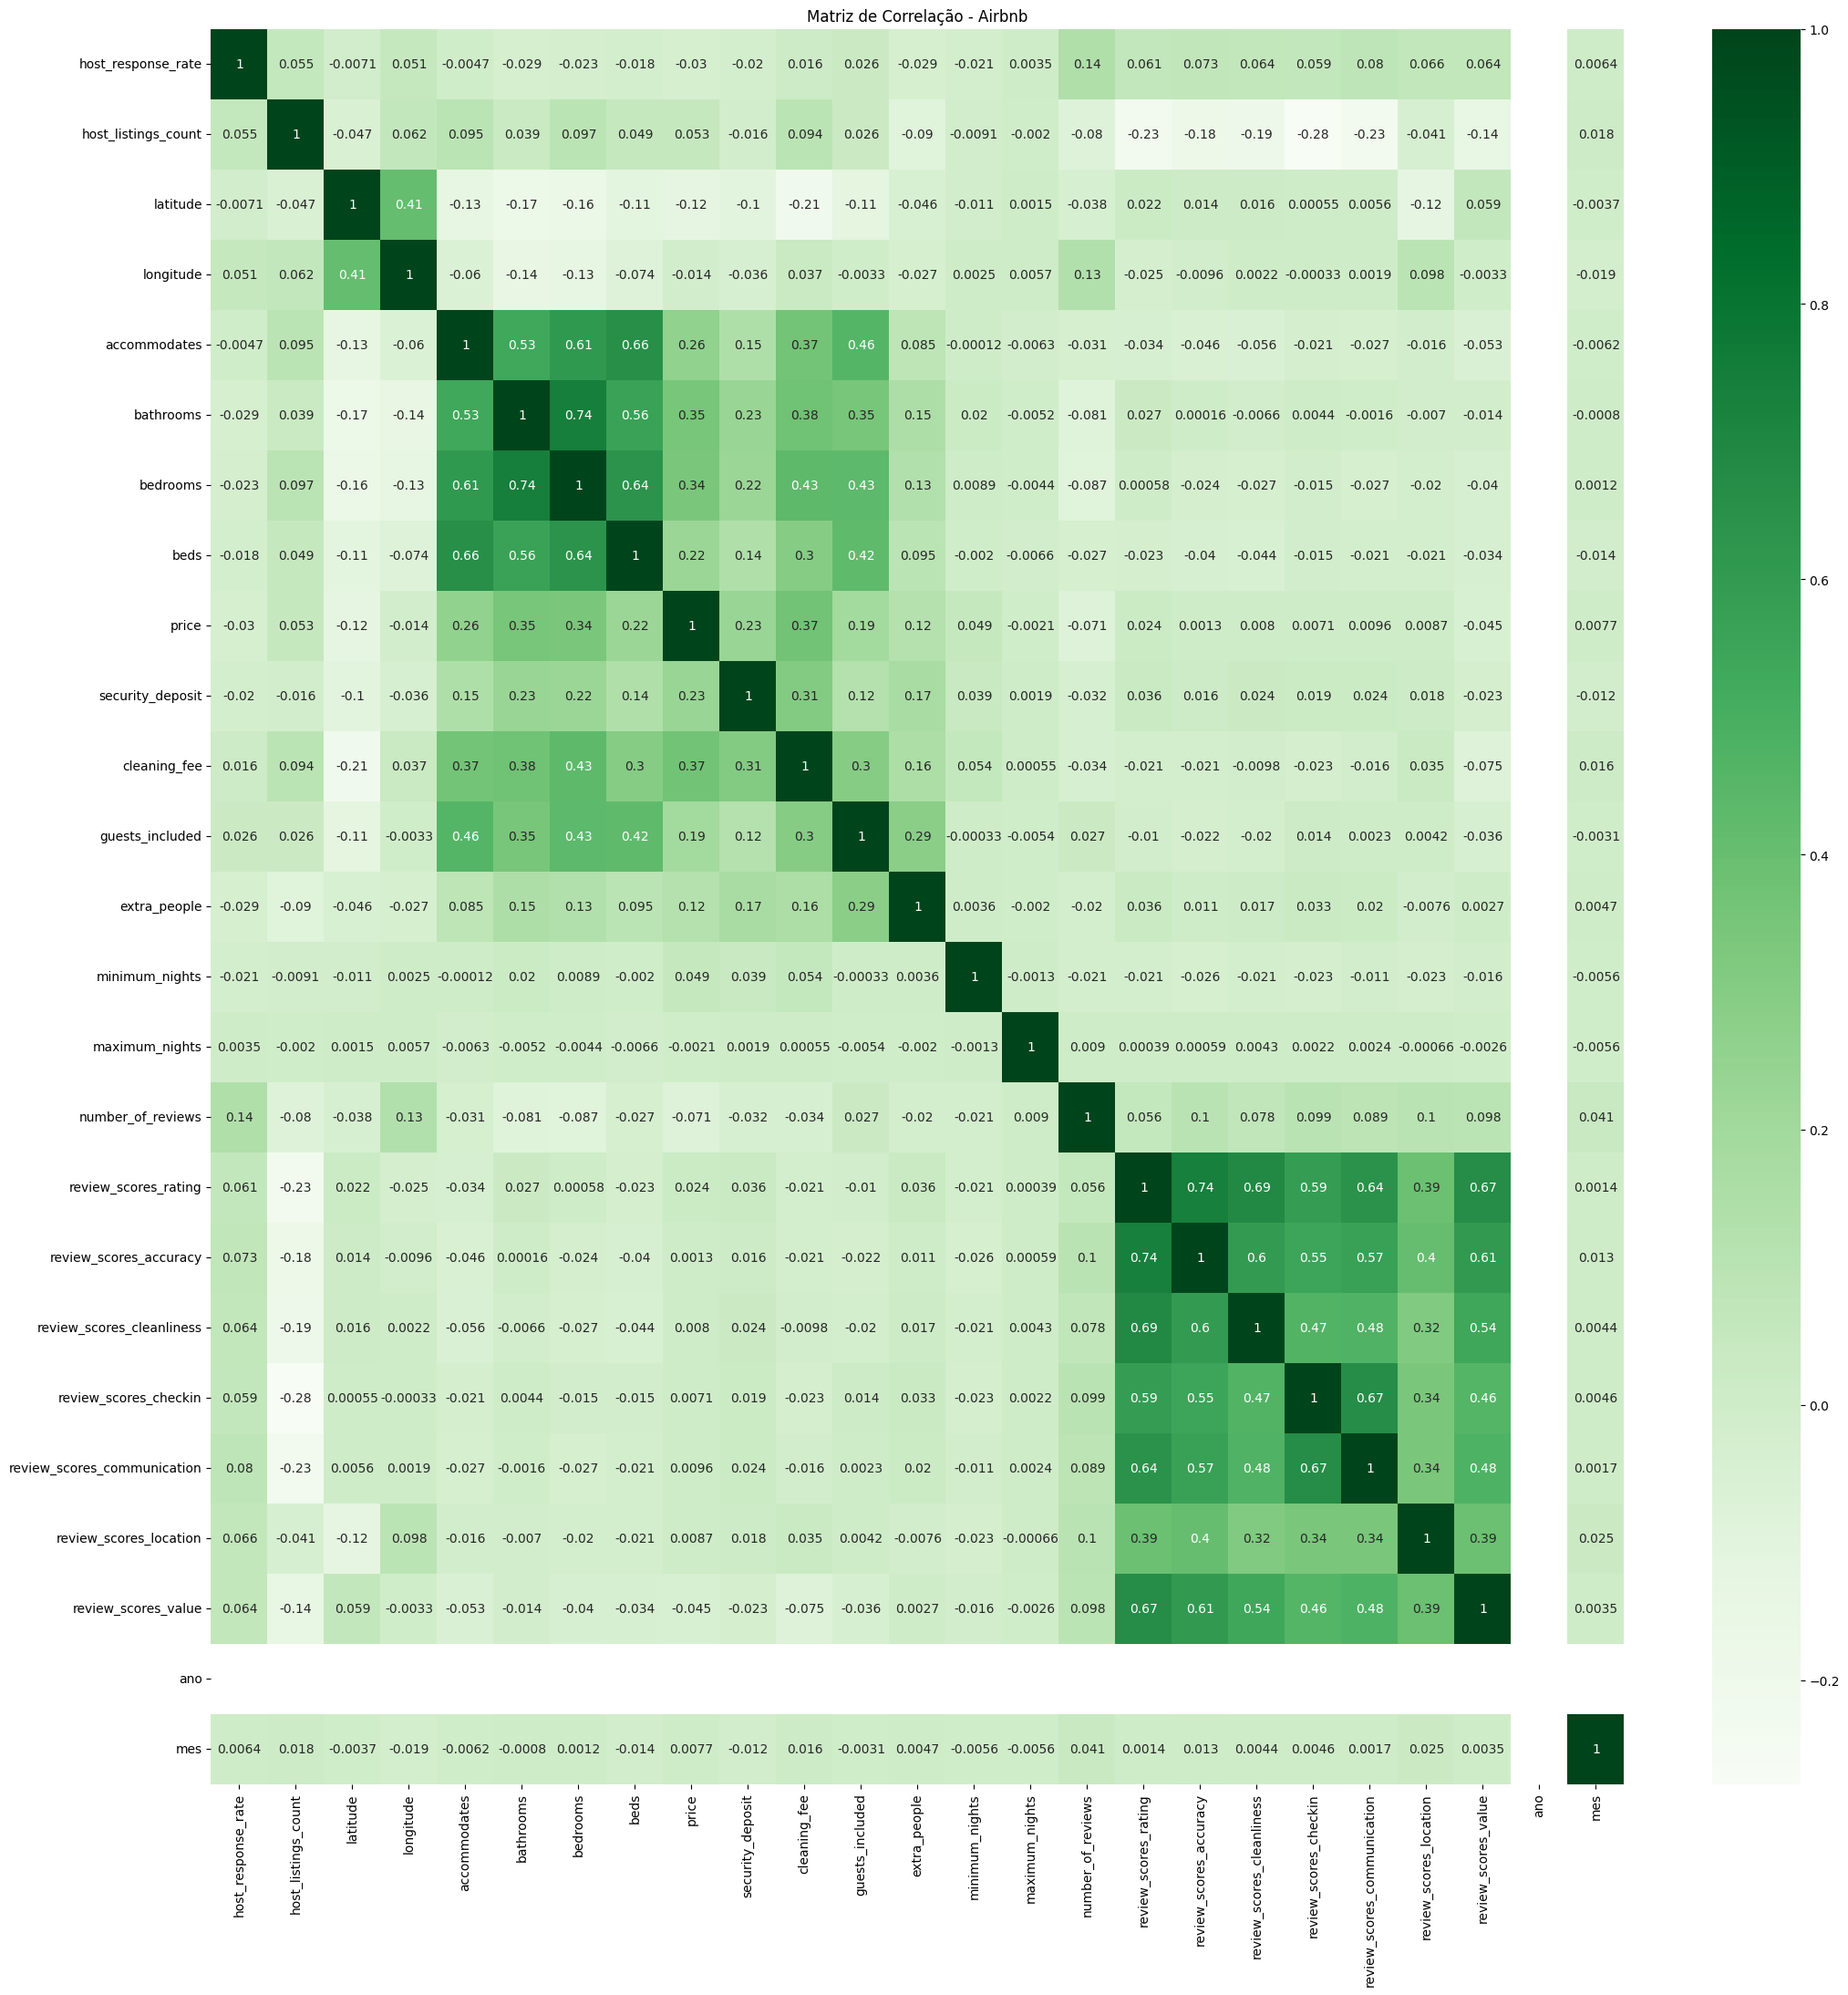

In [10]:
base_numerico = base_airbnb.select_dtypes(include=['float32', 'float64', 'int64', 'int32'])

plt.figure(figsize=(25, 25))
sns.heatmap(base_numerico.corr(), annot=True, cmap='Greens')
plt.title('Matriz de Correlação - Airbnb')
plt.show()

# Definição de Funções para Análise de Outliers
Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [11]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [12]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

# price


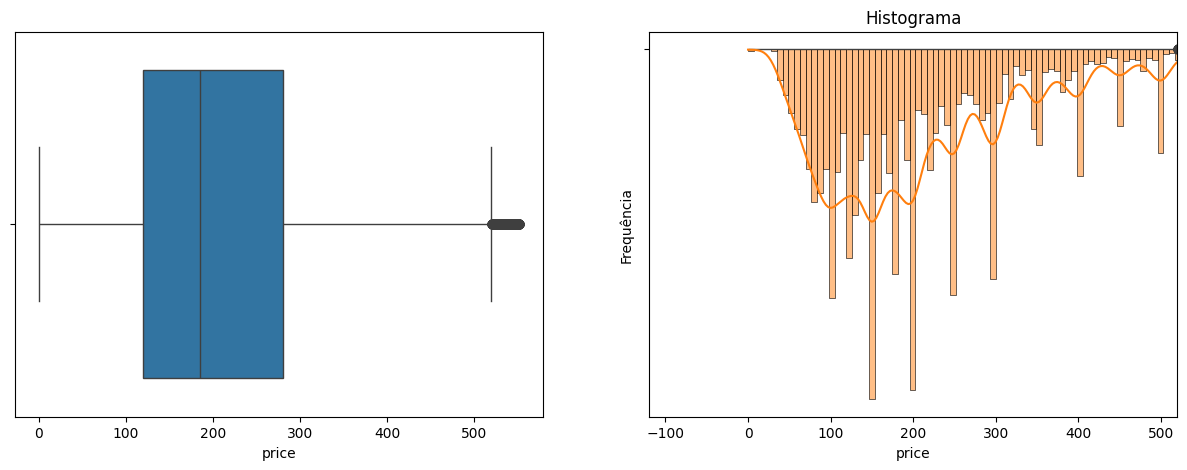

In [37]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

# removendo outliers de price


In [38]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas'.format(linhas_removidas))

986 linhas removidas


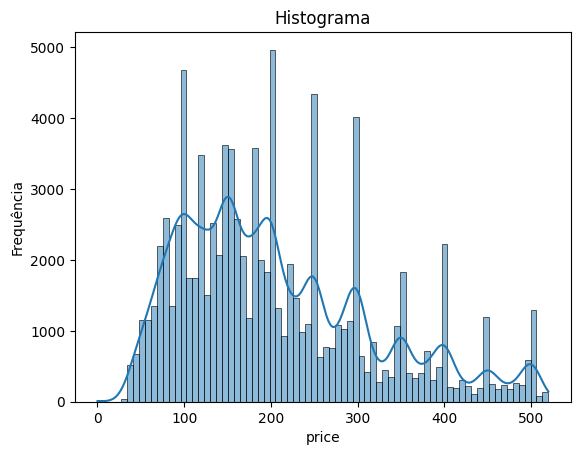

(94773, 34)


In [39]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

In [40]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

0 linhas removidas


# bathrooms


<Axes: xlabel='bathrooms', ylabel='count'>

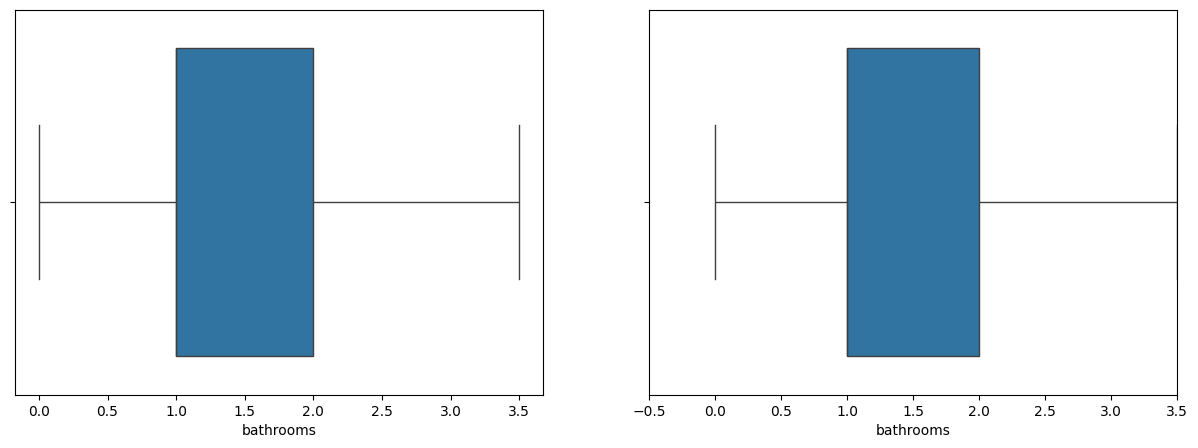

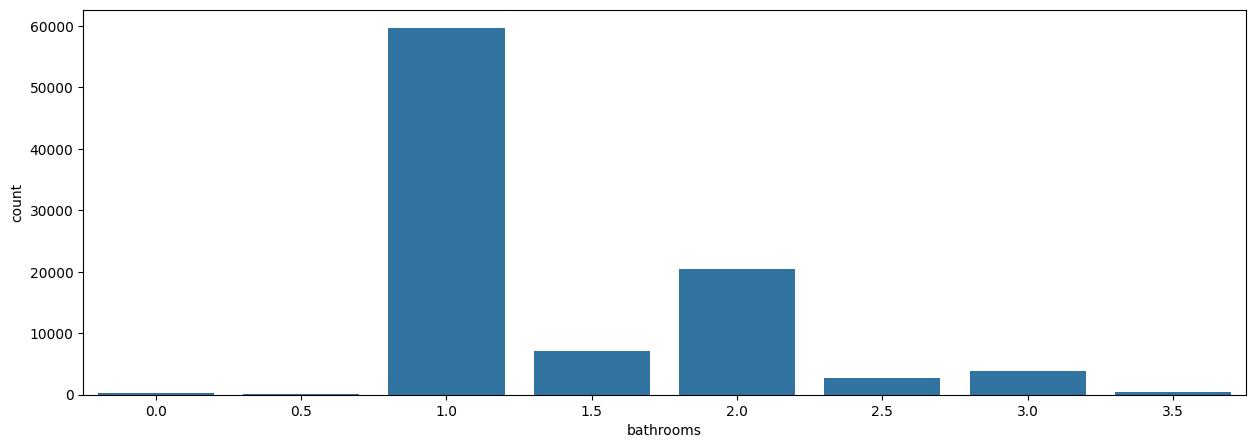

In [41]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

In [42]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

0 linhas removidas


# extra_people

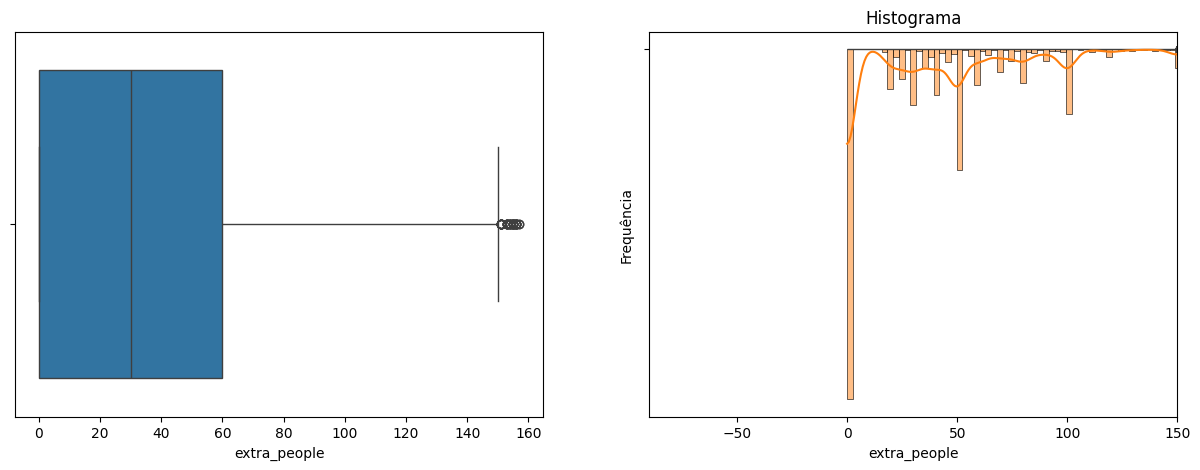

In [43]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [44]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

42 linhas removidas


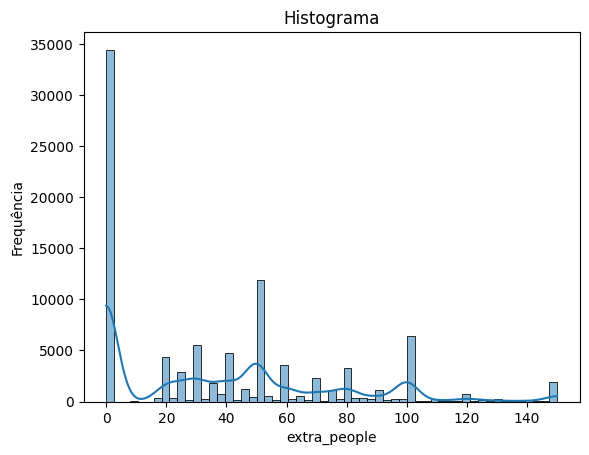

(94731, 34)


In [45]:
histograma(base_airbnb['extra_people'])
print(base_airbnb.shape)

# bedrooms

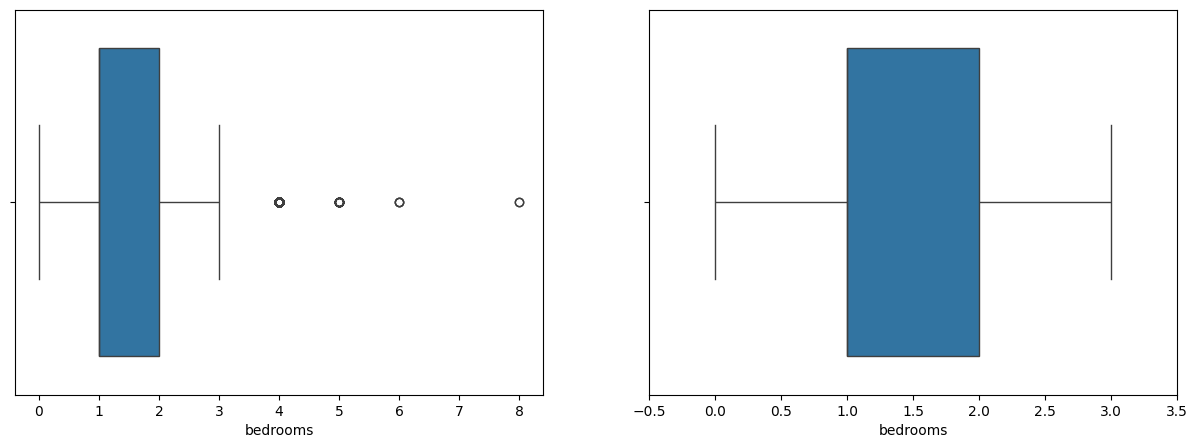

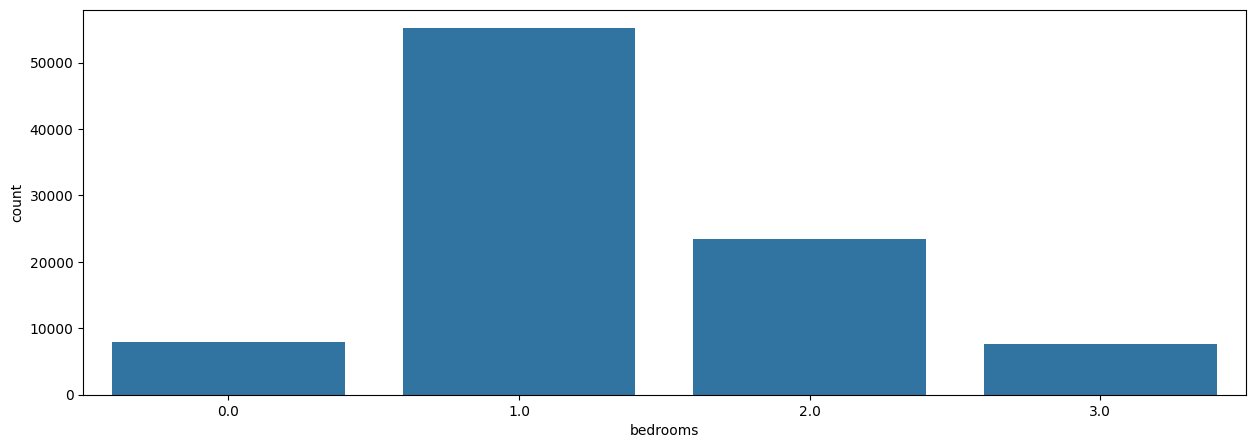

In [46]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

# beds

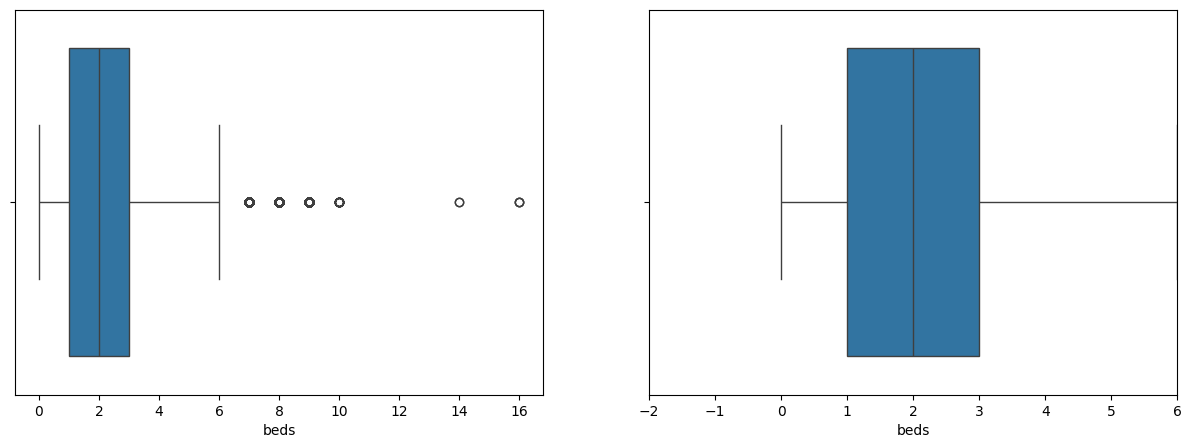

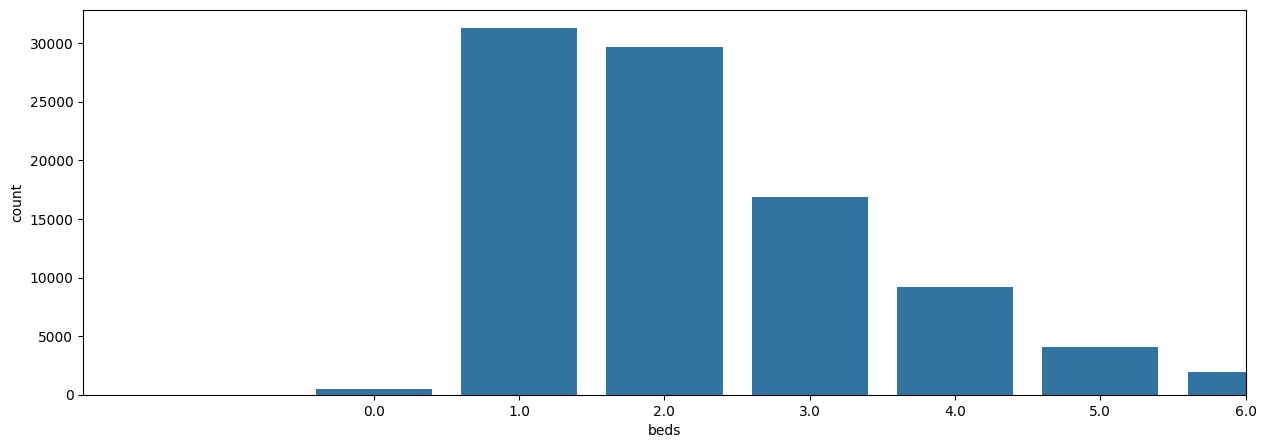

In [47]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

# guests_included

(np.float64(-0.5), np.float64(3.5))


<Axes: xlabel='guests_included', ylabel='count'>

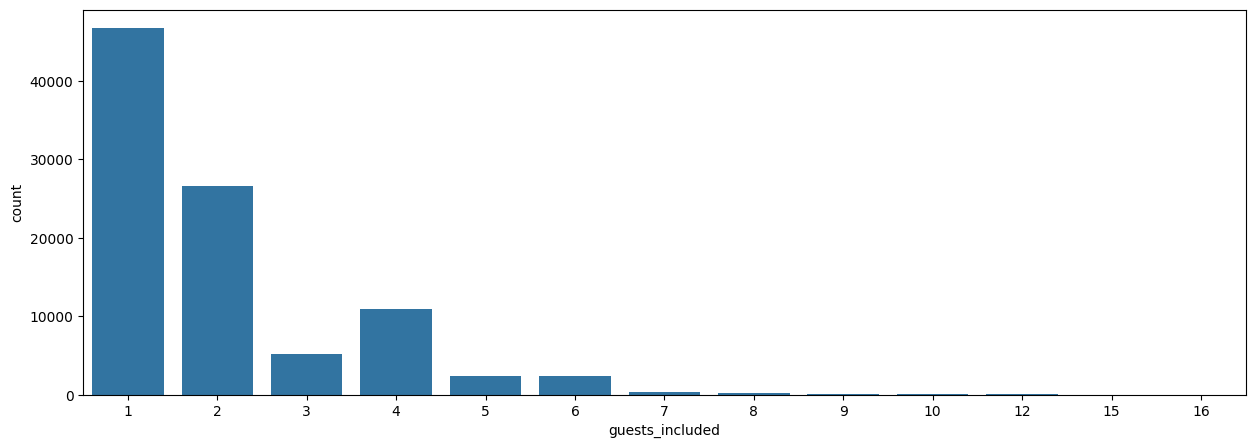

In [48]:
print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

# minimum_nights

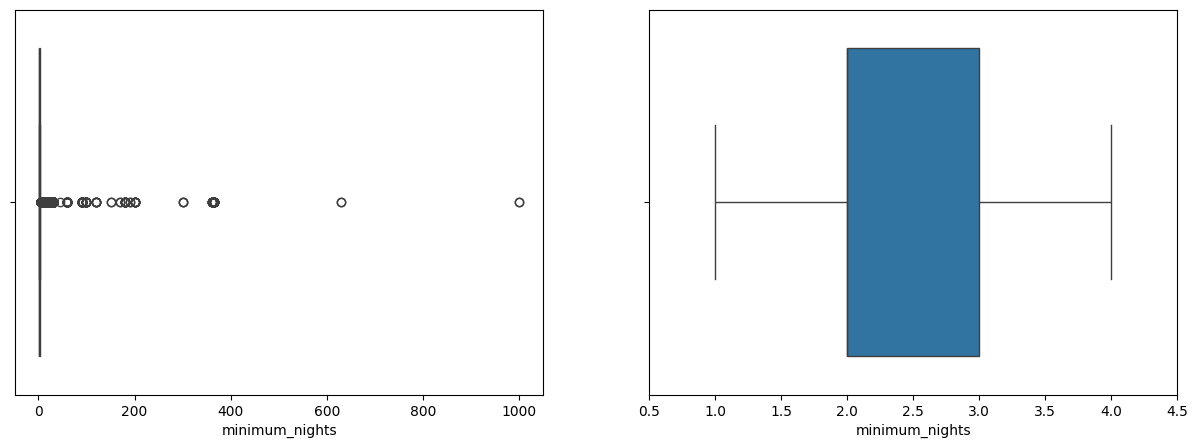

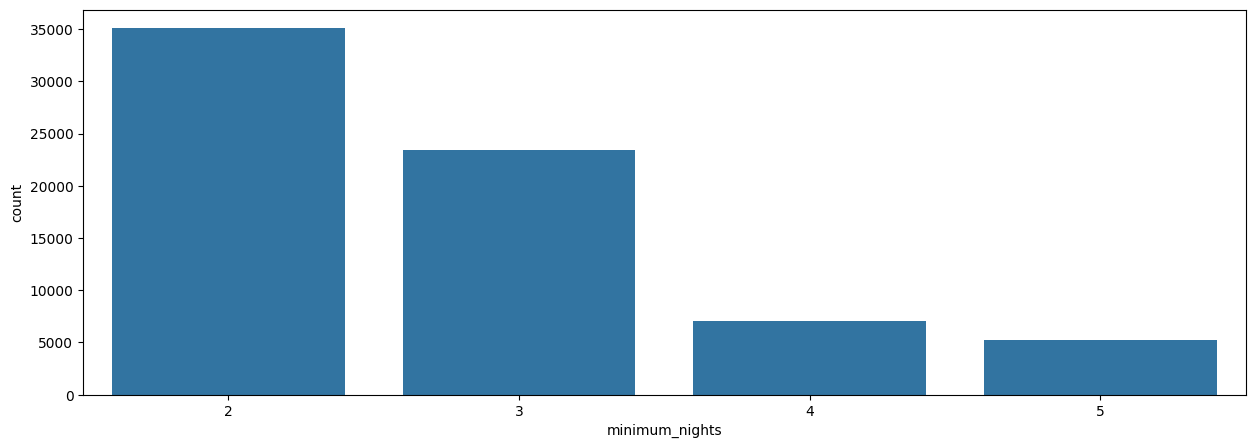

In [49]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

# maximum_nights


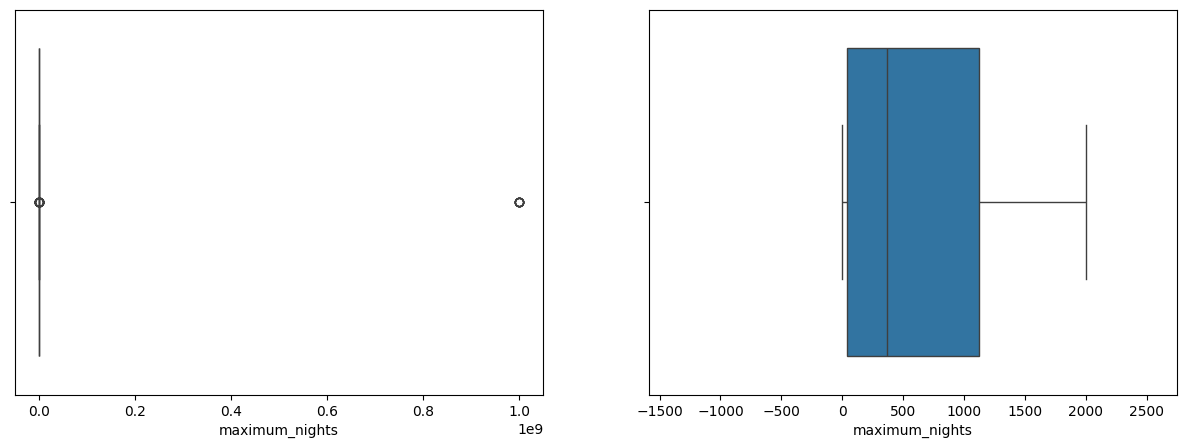

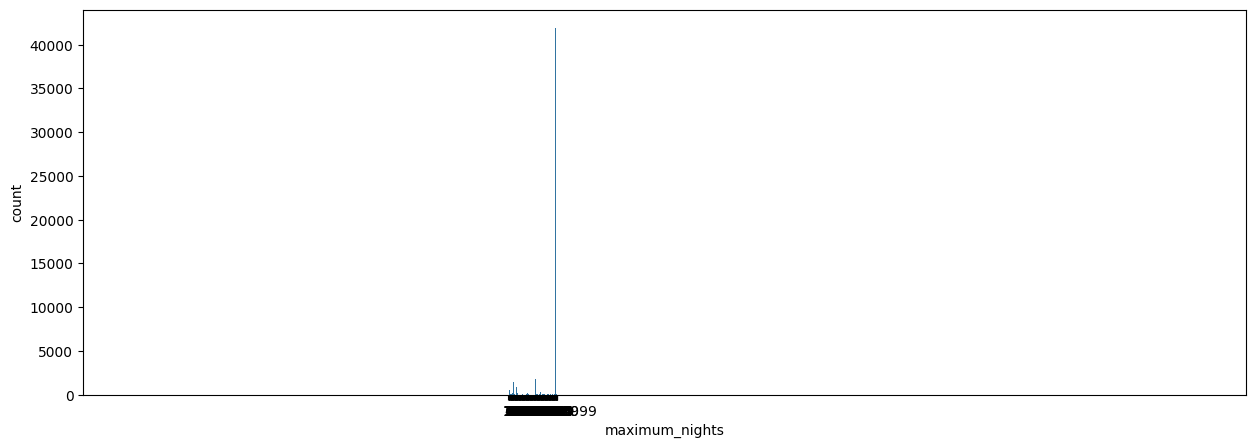

In [50]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

- Essa coluna não parece que vai ajudar na análise.
- Isso porque parece que quase todos os hosts não preenchem esse campo de maximum nights, então ele não parece que vai ser um fator relevante.
- É melhor excluirmos essa coluna da análise

In [51]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(94731, 33)

# number_of_reviews


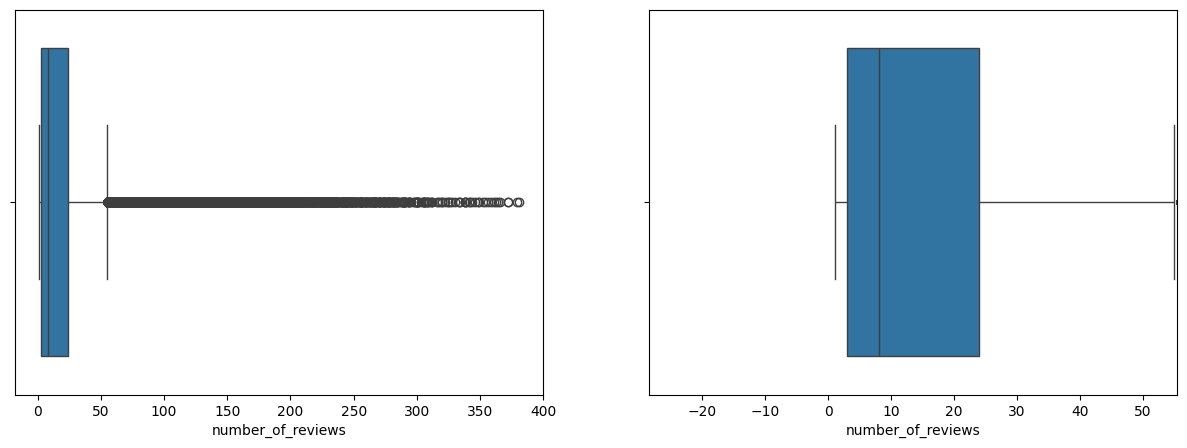

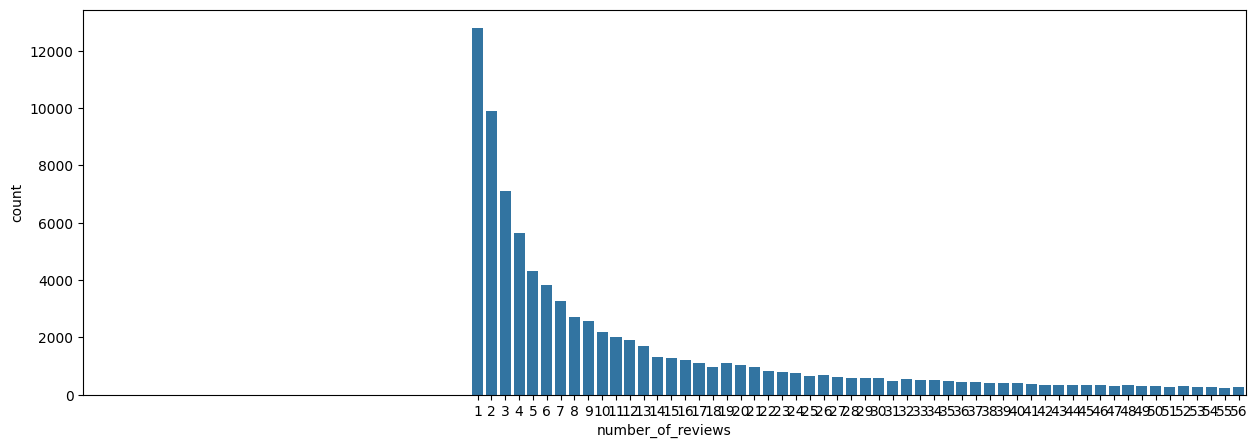

In [52]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

# Tratamento de colunas do tipo string

# Property Type

In [53]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))


property_type
Apartment                 73809
Condominium                6086
House                      4765
Serviced apartment         3776
Loft                       2916
Guest suite                 636
Guesthouse                  447
Aparthotel                  419
Bed and breakfast           343
Townhouse                   313
Hostel                      276
Hotel                       256
Boutique hotel              126
Other                       121
Villa                       109
Chalet                       96
Tiny house                   62
Cottage                      36
Earth house                  33
Bungalow                     31
Island                       14
Nature lodge                 14
Cabin                        12
Treehouse                    11
Casa particular (Cuba)        7
Dome house                    6
Hut                           4
Barn                          4
Igloo                         3
Name: count, dtype: Int64


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

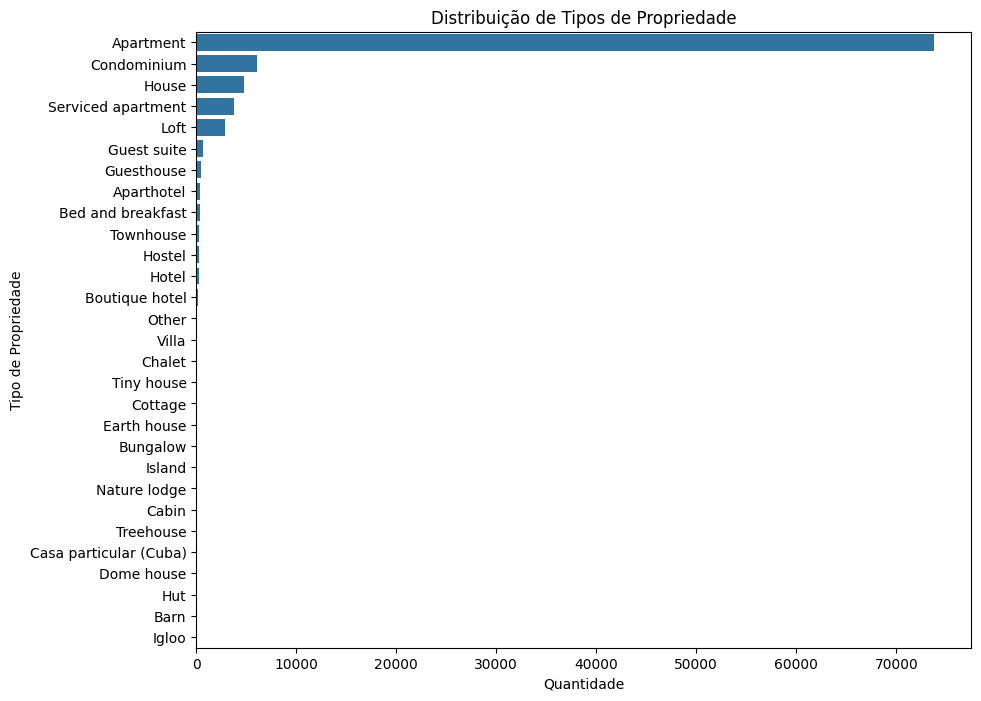

In [54]:
plt.figure(figsize=(10, 8))
grafico = sns.countplot(y='property_type', data=base_airbnb,
                        order=base_airbnb['property_type'].value_counts().index)
grafico.tick_params(axis='y', rotation=0) 
plt.title('Distribuição de Tipos de Propriedade')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Propriedade')
plt.show()

In [55]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())


['Guest suite', 'Guesthouse', 'Aparthotel', 'Bed and breakfast', 'Townhouse', 'Hostel', 'Hotel', 'Boutique hotel', 'Other', 'Villa', 'Chalet', 'Tiny house', 'Cottage', 'Earth house', 'Bungalow', 'Island', 'Nature lodge', 'Cabin', 'Treehouse', 'Casa particular (Cuba)', 'Dome house', 'Hut', 'Barn', 'Igloo']
property_type
Apartment             73809
Condominium            6086
House                  4765
Serviced apartment     3776
Outros                 3379
Loft                   2916
Name: count, dtype: Int64


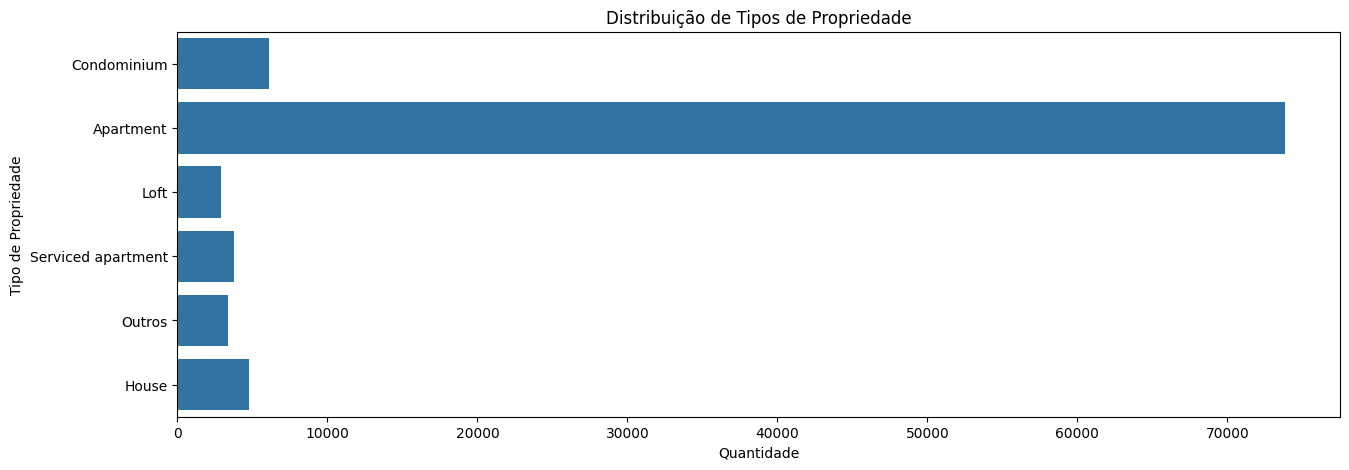

In [56]:
plt.figure(figsize=(15, 5))
grafico = sns.countplot(y='property_type', data=base_airbnb)
grafico.tick_params(axis='y', rotation=0)  # não precisa rotacionar os labels
plt.title('Distribuição de Tipos de Propriedade')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Propriedade')
plt.show()

# Room type

room_type
Entire home/apt    71831
Private room       21169
Shared room         1139
Hotel room           592
Name: count, dtype: Int64


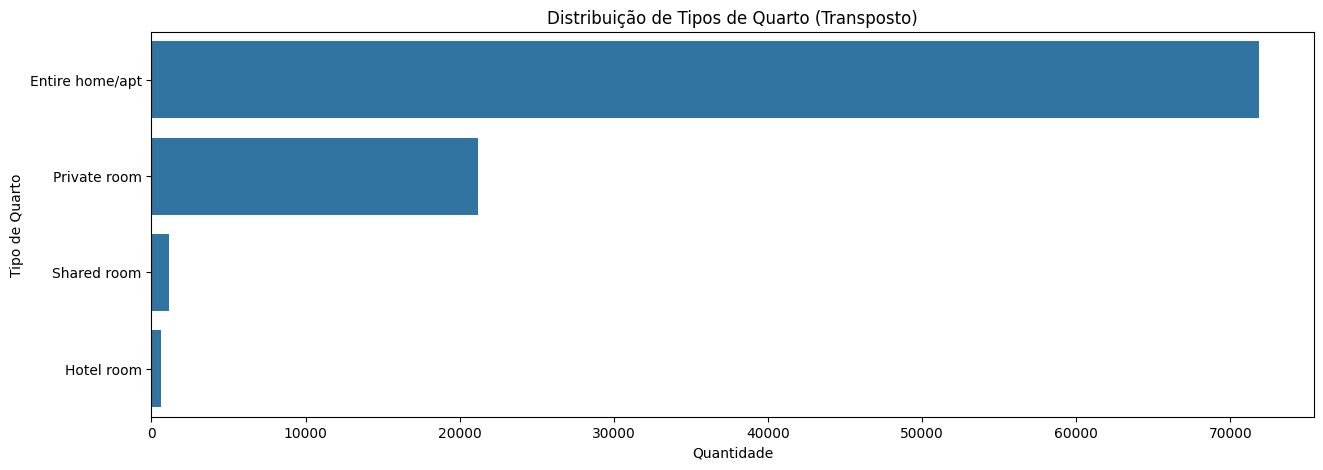

In [57]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(
    y='room_type',
    data=base_airbnb,
    order=base_airbnb['room_type'].value_counts().index
)
grafico.tick_params(axis='y', rotation=0)
plt.title('Distribuição de Tipos de Quarto (Transposto)')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Quarto')
plt.show()

# Bed type

bed_type
Real Bed         93470
Pull-out Sofa      935
Futon              236
Couch               73
Airbed              17
Name: count, dtype: Int64


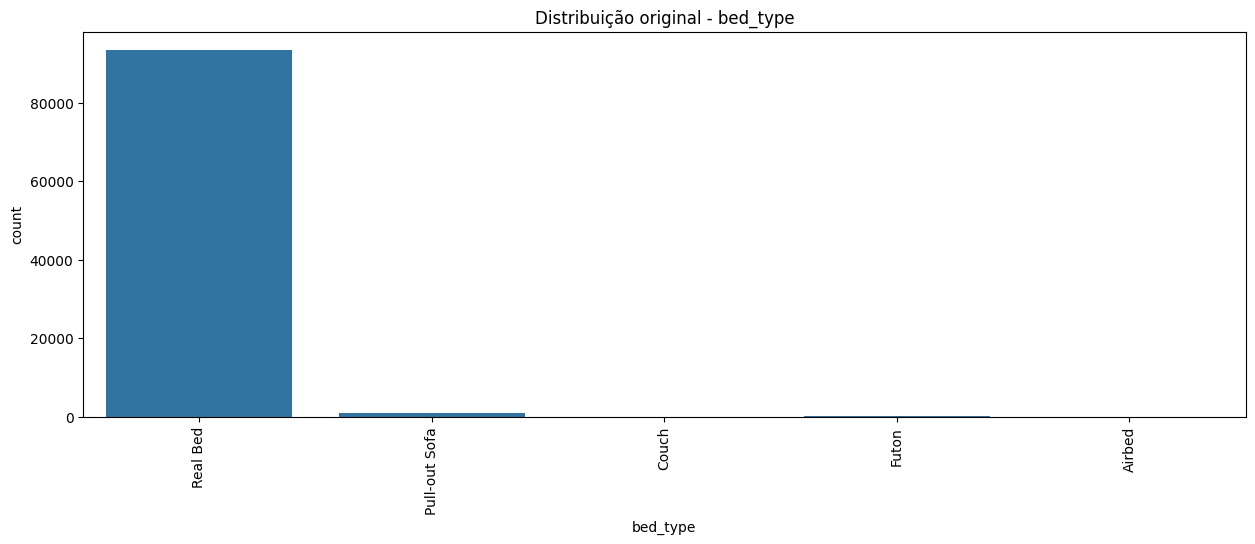

bed_type
Real Bed    93470
Outros       1261
Name: count, dtype: Int64


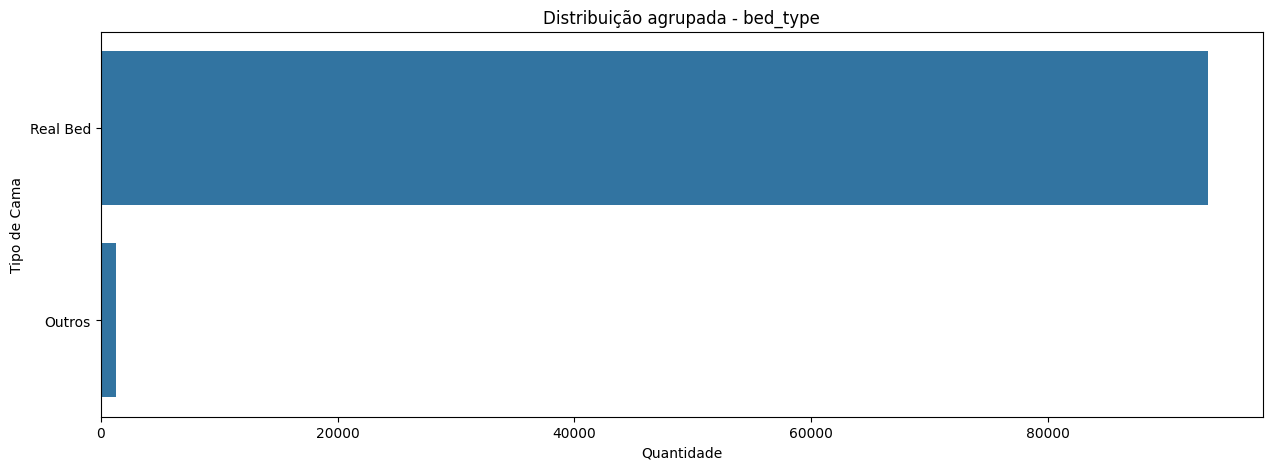

In [58]:
print(base_airbnb['bed_type'].value_counts())


plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)
plt.title('Distribuição original - bed_type')
plt.show()

tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar = tabela_bed[tabela_bed < 10000].index.tolist()

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type'] == tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(y='bed_type', data=base_airbnb,
                        order=base_airbnb['bed_type'].value_counts().index)
grafico.tick_params(axis='y', rotation=0)
plt.title('Distribuição agrupada - bed_type')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Cama')
plt.show()

# Cancellation policy

cancellation_policy
strict_14_with_grace_period    50851
moderate                       22684
flexible                       19068
super_strict_60                 1347
super_strict_30                  769
strict                            12
Name: count, dtype: Int64


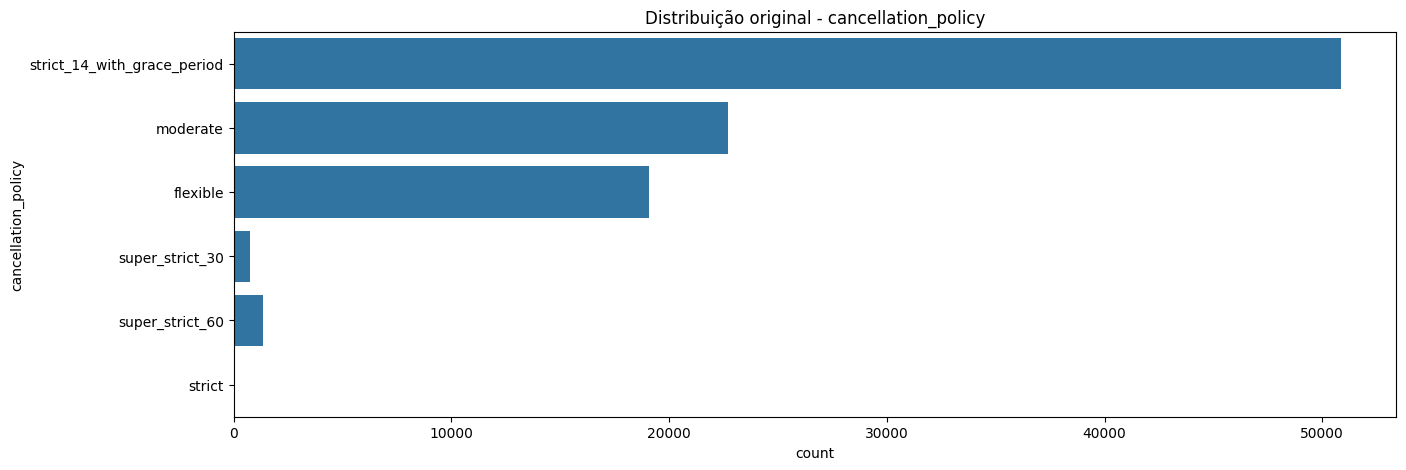

['super_strict_60', 'super_strict_30', 'strict']
cancellation_policy
strict_14_with_grace_period    50851
moderate                       22684
flexible                       19068
strict                          2128
Name: count, dtype: Int64


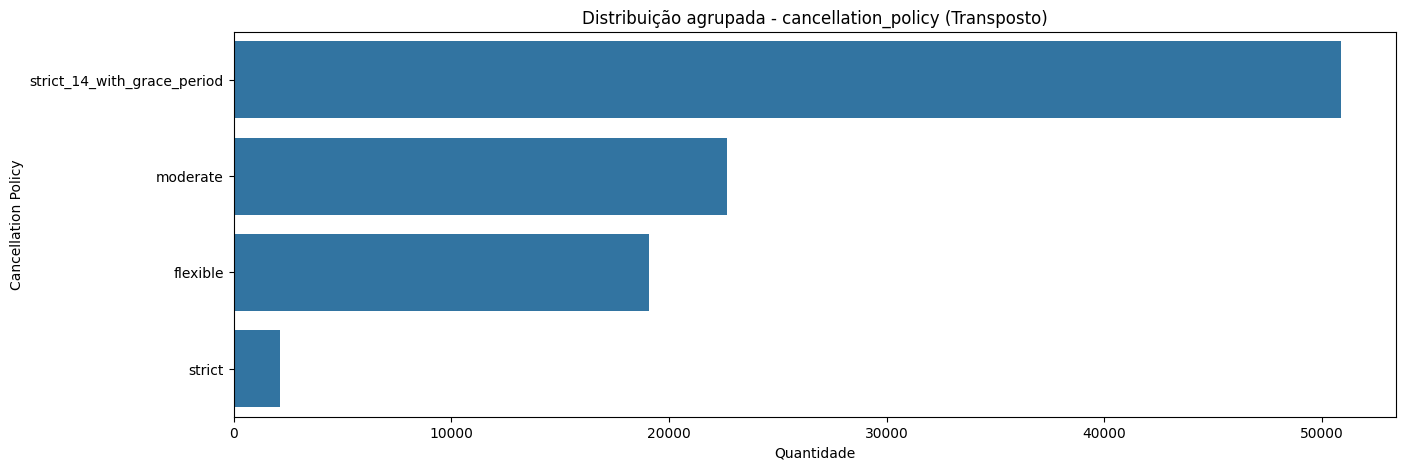

In [59]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(y='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='y', rotation=0)
plt.title('Distribuição original - cancellation_policy')
plt.show()

tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy'] == tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(y='cancellation_policy', data=base_airbnb,
                        order=base_airbnb['cancellation_policy'].value_counts().index)
grafico.tick_params(axis='y', rotation=0)
plt.title('Distribuição agrupada - cancellation_policy (Transposto)')
plt.xlabel('Quantidade')
plt.ylabel('Cancellation Policy')
plt.show()


# Amenities

In [60]:
print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


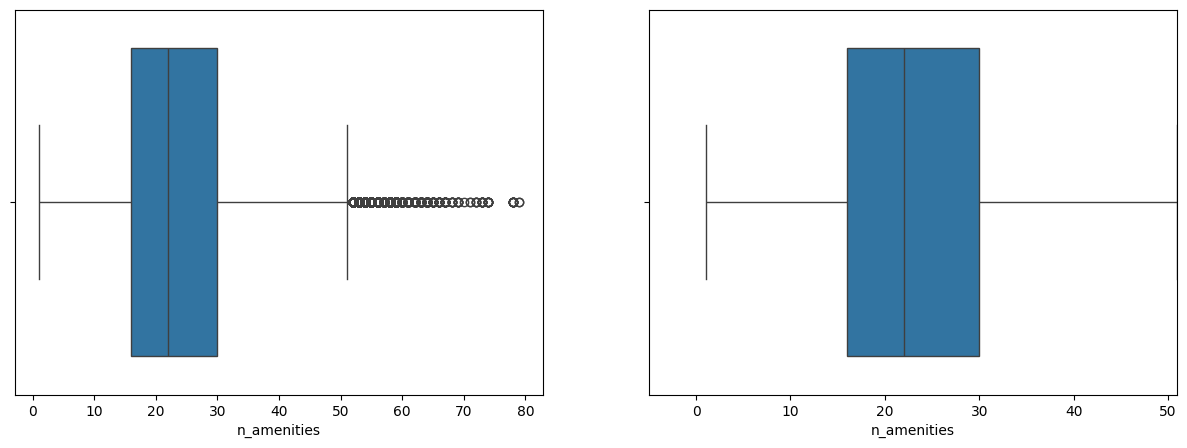

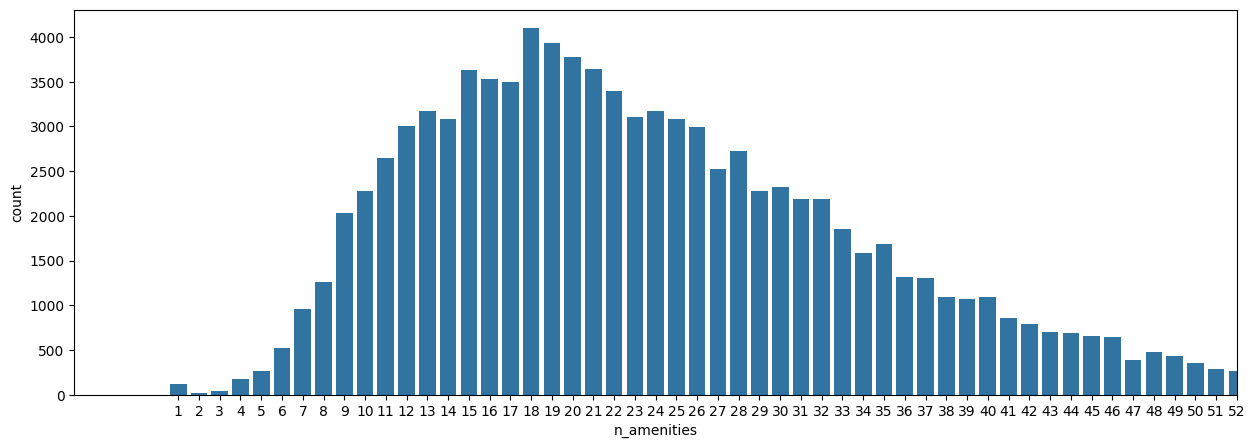

In [61]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

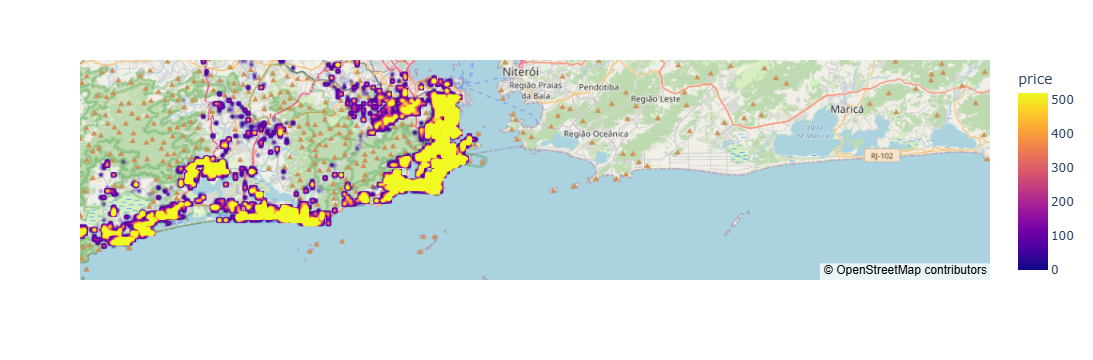

In [62]:
amostra = base_airbnb.sample(n=90000)
centro_mapa = {'lat': amostra.latitude.mean(), 'lon': amostra.longitude.mean()}

mapa = px.density_map(
    amostra,
    lat='latitude',
    lon='longitude',
    z='price',
    radius=2.5,
    center=centro_mapa,
    zoom=10,
    map_style='open-street-map'
)

mapa.show()

# Gerando base Prata

In [44]:
base_airbnb.to_csv('base_de_dados_prata.csv', index=False)